In [2]:
import os
import cv2
import IPython
import matplotlib
import matplotlib.pyplot as pyplot
import keras
from keras.models import load_model
import keras.saving
import keras.utils
import tensorflow as tf
import numpy as np

dataDir = "E:/Work/NonoGram/"

digitRecognizerModelFileName = f"{dataDir}/digitRecognizerMnist.keras"
digitRecognizer = load_model(digitRecognizerModelFileName)


# Read image

In [3]:
#image = cv2.imread('E:/Work/NonoGram/Data/sample.png') 
#image = cv2.imread('E:/Work/NonoGram/Data/puzzle.jpg') 
image = cv2.imread('E:/Work/NonoGram/Data/wikipedia.png') 


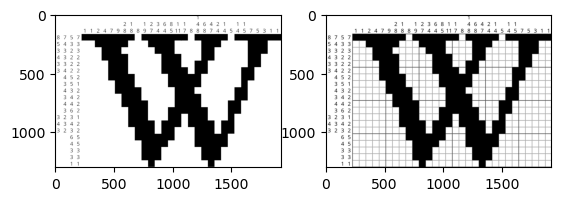

In [5]:
image_contours = image.copy()
image_contours = cv2.cvtColor(image_contours, cv2.COLOR_BGR2GRAY)
(_, image_contours) = cv2.threshold(image_contours, 10, 255, cv2.THRESH_BINARY)

image_digits = image.copy()
image_digits = cv2.GaussianBlur(image_digits, (1, 1), 0)
(_, image_contours) = cv2.threshold(image_contours, 10, 255, cv2.THRESH_BINARY)
#imageCopy = cv2.dilate(imageCopy, (3,3), 1)
#imageCopy = cv2.GaussianBlur(imageCopy, (1, 1), 0)
#imageCopy = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#imageCopy = cv2.Canny(imageCopy, 50, 150)
#imageCopy = 255-imageCopy
#imageCopy = cv2.Canny(imageCopy, 50, 150)

pyplot.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
pyplot.imshow(image_contours, cmap="gray")
pyplot.subplot(1, 2, 2)
pyplot.imshow(image_digits, cmap="gray")


# Find left and right based on lines

117.5
[[[ 197 1255]]

 [[ 189 1262]]

 [[ 191 1263]]

 [[ 196 1259]]

 [[ 197 1260]]

 [[ 197 1287]]

 [[ 200 1287]]

 [[ 200 1255]]]
120.0
[[[ 197 1255]]

 [[ 194 1258]]

 [[ 193 1258]]

 [[ 190 1261]]

 [[ 189 1261]]

 [[ 189 1262]]

 [[ 190 1263]]

 [[ 191 1263]]

 [[ 192 1262]]

 [[ 193 1262]]

 [[ 196 1259]]

 [[ 197 1260]]

 [[ 197 1287]]

 [[ 200 1287]]

 [[ 200 1255]]]
118.0
[[[ 141 1255]]

 [[ 133 1261]]

 [[ 133 1263]]

 [[ 134 1264]]

 [[ 138 1260]]

 [[ 140 1261]]

 [[ 140 1286]]

 [[ 143 1287]]

 [[ 143 1255]]]
119.5
[[[ 141 1255]]

 [[ 140 1256]]

 [[ 139 1256]]

 [[ 136 1259]]

 [[ 135 1259]]

 [[ 133 1261]]

 [[ 133 1263]]

 [[ 134 1264]]

 [[ 138 1260]]

 [[ 139 1260]]

 [[ 140 1261]]

 [[ 140 1286]]

 [[ 141 1287]]

 [[ 143 1287]]

 [[ 143 1255]]]
204.0
[[[ 194 1198]]

 [[ 187 1202]]

 [[ 199 1201]]

 [[ 202 1203]]

 [[ 203 1208]]

 [[ 199 1212]]

 [[ 192 1213]]

 [[ 192 1215]]

 [[ 202 1217]]

 [[ 204 1223]]

 [[ 199 1228]]

 [[ 187 1226]]

 [[ 187 1229]]

 [[ 197 12

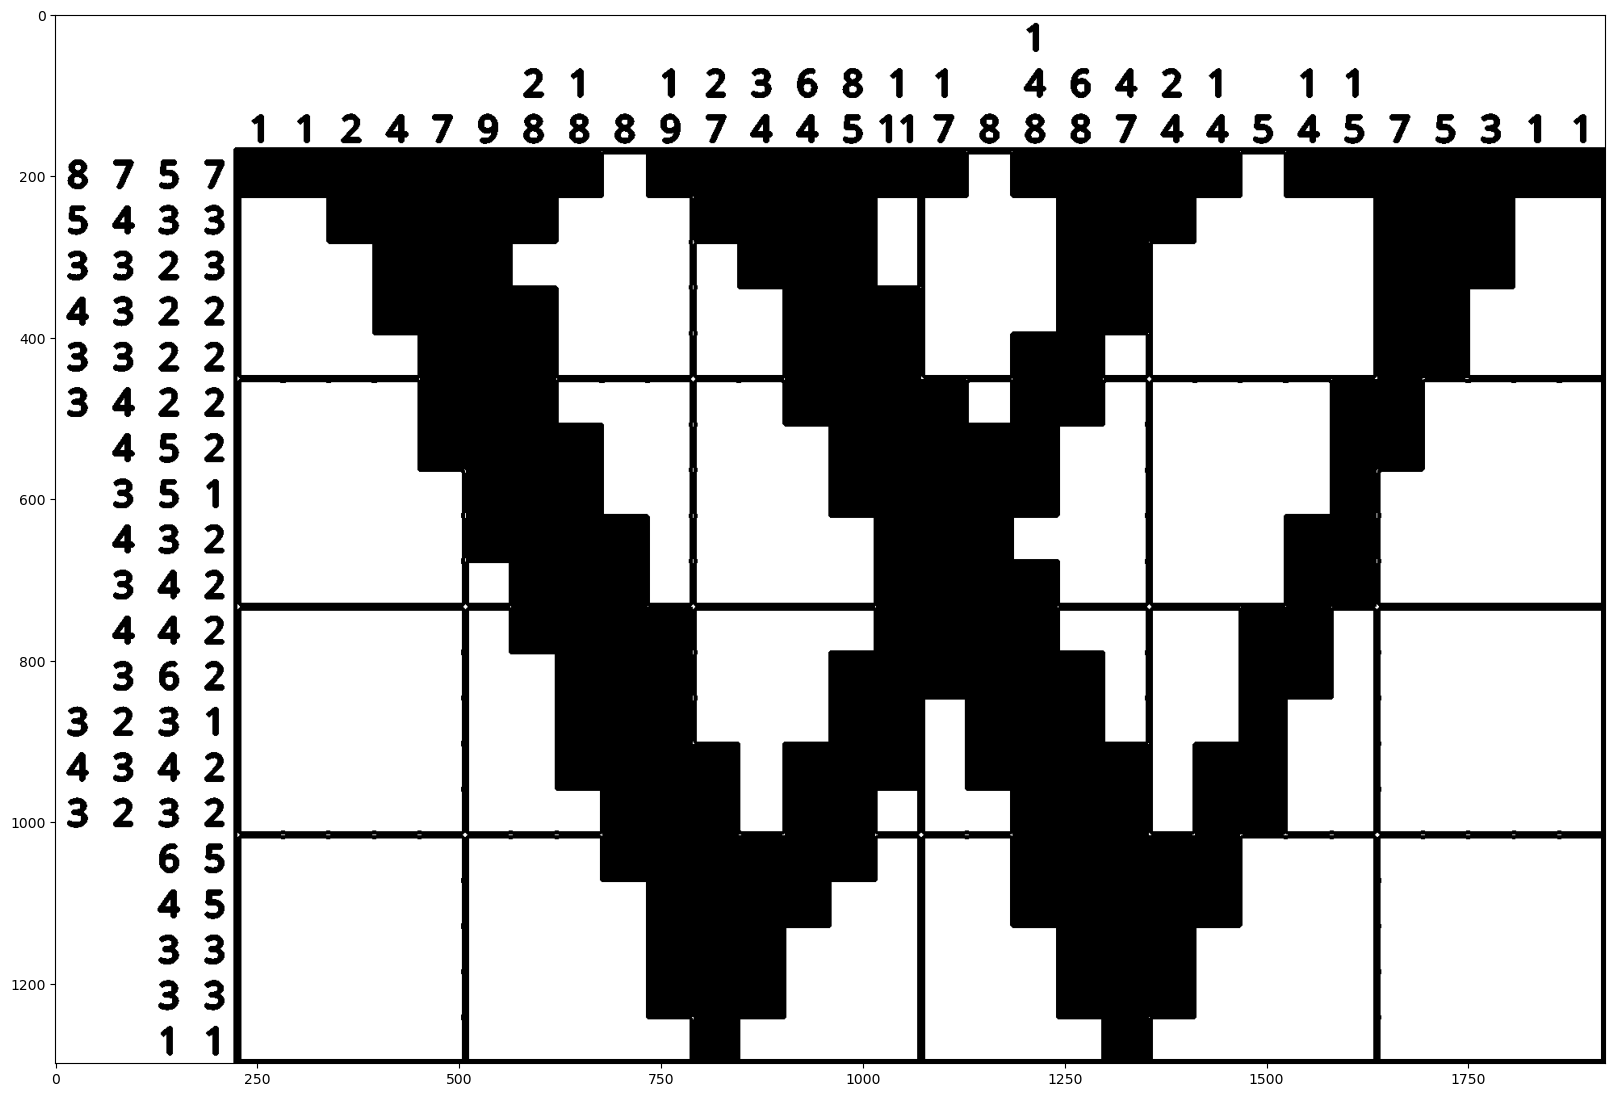

In [16]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
newContours = []
for contour in contours:
    if len(contour) > 0:
        epsilon = 0.01 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        print(cv2.contourArea(approx))
        print(approx)        
        print(cv2.contourArea(contour))
        print(contour)
        newContours.append(approx)
imageContours = imageCopy.copy()
cv2.drawContours(imageContours, contours, -1, (0, 255, 0), 3)        
pyplot.figure(figsize= (20,20))
pyplot.imshow(imageContours, cmap="gray")
pyplot.show()


In [17]:
outline = newContours[0]

[ 197 1260]


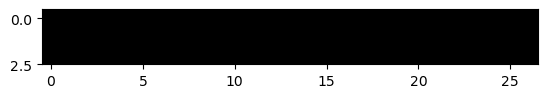

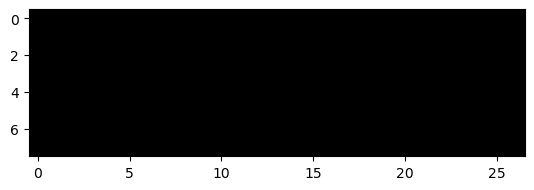

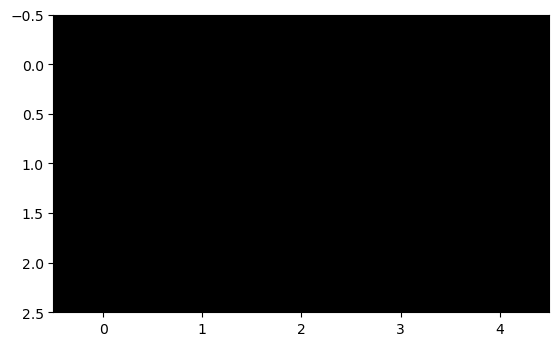

In [18]:
topLeft = (outline.min(axis=0, keepdims=True))[0][0]
bottomRight = outline.max(axis=0, keepdims=True)[0][0]
for pointArray in outline:
    point = pointArray[0]
    if (
            point[0] > topLeft[0] and point[0] < bottomRight[0] and
            point[1] > topLeft[1] and point[1] < bottomRight[1]
        ):
        insidePoint = point
print(insidePoint)
insideImage = imageCopy[insidePoint[0]:bottomRight[0], insidePoint[1]:bottomRight[1]]
topSide = imageCopy[topLeft[0]:insidePoint[0], insidePoint[1]:bottomRight[1]]
leftSide = imageCopy[insidePoint[0]:bottomRight[0], topLeft[1]:insidePoint[1]]

pyplot.imshow(insideImage, cmap="gray")
pyplot.show()
pyplot.imshow(topSide, cmap="gray")
pyplot.show()
pyplot.imshow(leftSide, cmap="gray")
pyplot.show()

# todo check and test :D


# Train model

In [19]:
from keras.models import load_model
# Load the MNIST dataset from OpenCV (this loads pre-trained data)
# This is a convenient way to quickly get started with digit recognition.
def createDigitRecognizer():
    # Load the MNIST dataset
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    
    # Preprocess the images
    train_images = train_images.astype('float32') / 255
    test_images = test_images.astype('float32') / 255

    # Reshape the images and add a channel dimension
    train_images = np.expand_dims(train_images, axis=-1)
    test_images = np.expand_dims(test_images, axis=-1)

    # One-hot encode the labels
    train_labels = tf.keras.utils.to_categorical(train_labels)
    test_labels = tf.keras.utils.to_categorical(test_labels)
    
    # Build the CNN model
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))
    return model

import os

import keras.saving
digitRecognizerModelFileName = f"{dataDir}/digitRecognizerMnist.keras"
if (os.path.exists(digitRecognizerModelFileName)):
    digitRecognizer = load_model(digitRecognizerModelFileName)
else:
    digitRecognizer = createDigitRecognizer()
    digitRecognizer.save(f"{dataDir}/digitRecognizerMnist.keras")

# Recognize digits

In [20]:
def extract_digit_image_from_contour(image, contour):
    x, y, w, h = cv2.boundingRect(contour)
    x -= 1
    y -= 1
    w += 2
    h += 2
    bounding_rect = (x, y, w, h)

    if (w > h):
        delta = (w-h)//2
        y -= delta
        h = w - delta
        #digit_image = image[y-delta:y+w-delta, x:x+w]
    else:
        delta = (h-w)//2
        x -= delta
        w = h - delta
        #digit_image = image[y:y+h, x-delta:x+h-delta]
    if (x < 0):
        x = 0
    if (y < 0):
        y = 0
    if (x + w > image.shape[0]):
        x = image.shape[0] - w
    if (y + h > image.shape[1]):
        y = image.shape[1] - h
    
    
    digit_image = image[y:y+h, x-delta:x+h-delta]

    return (digit_image, bounding_rect)

def prepare_digit_image_for_recognition(digit_image):
    digit_image = cv2.resize(digit_image, (28, 28), interpolation=cv2.INTER_AREA)
    digit_image = cv2.GaussianBlur(digit_image, (3,3), 0)
    digit_image = 1-digit_image.reshape(1, 28, 28, 1)
    return digit_image

def recognize_digit_from_image(digit_recognizer, digit_image):
    probabilities = digitRecognizer(digit_image)
    predicted_digit = np.argmax(probabilities)

    #extractor = keras.Model(inputs=digitRecognizer.inputs, outputs=[layer.output for layer in digitRecognizer.layers])
    #intermediate_layer_model = keras.Model(inputs=digitRecognizer.input,
    #                               outputs=digitRecognizer.get_layer("dense_3").output)
    #intermediate_output = intermediate_layer_model(digit_image_resized)
    #print(intermediate_output)

    return (predicted_digit, probabilities)



In [ ]:
def paint_contours(image, contours):
    colors = [(0,0,255),(0,255,0),(255,0,0)]
    for index, contour in enumerate(contours):
        cv2.drawContours(image, [contour], -1, colors[index % len(colors)], 1)

def recognize_digits(image_contours, image_digits):
    found_contours = []
    image_output = cv2.cvtColor(image_digits, cv2.COLOR_GRAY2BGR)
    
    # Preprocess the image (resize, grayscale, thresholding, etc.)
    contours, _ = cv2.findContours(image_contours.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE )
    paint_contours(image_output, contours)

    for (contour, bounding) in sorted([(contour, cv2.boundingRect(contour))for contour in contours], key=lambda tuple: tuple[1]):
        digit_image, bounding_rect = extract_digit_image_from_contour(image_contours_thresh, contour)
        x, y, w, h = bounding_rect

        if (digit_image.size != 0):   # todo add notification we skip because None..
            digit_image = prepare_digit_image_for_recognition(digit_image)
            (predicted_digit, probabilities) = recognize_digit_from_image(digitRecognizer, digit_image)
            predictedProbability = probabilities[0][predicted_digit]

            area = cv2.contourArea(contour)
            aspectRatio = w / h

            if (predictedProbability > .8 and aspectRatio > .15 and aspectRatio < 1.5):# and area < 200):  # magic numbers!
                font = cv2.FONT_HERSHEY_PLAIN
                cv2.putText(image_output, str(predicted_digit), (x, y), font, 4, (255, 0, 0))
                found_contours.append((bounding_rect, predicted_digit, digit_image))
            else:
                print(f"no digit found: {predicted_digit} {bounding_rect} {aspectRatio} {probabilities}")
                found_contours.append((bounding_rect, None, digit_image))

    pyplot.imshow(image_output, cmap="gray")
    return found_contours

found_contours = recognize_digits(image_output)

KeyboardInterrupt: 

remove (19, 354, 14, 21) 1
remove (19, 919, 14, 20) 1
remove (20, 198, 16, 15) 5
remove (21, 184, 14, 13) 3
remove (75, 242, 15, 20) 4
remove (75, 467, 15, 21) 1
remove (75, 524, 15, 20) 1
remove (75, 637, 15, 20) 1
remove (75, 750, 15, 20) 4
remove (132, 693, 14, 20) 1
remove (132, 750, 14, 20) 1
remove (132, 919, 14, 20) 1
remove (132, 1089, 14, 20) 1
remove (133, 1043, 16, 17) 3
remove (414, 129, 15, 20) 4
remove (528, 127, 16, 17) 0
remove (585, 142, 16, 15) 3
remove (586, 127, 14, 14) 3
remove (641, 142, 17, 15) 6
remove (642, 127, 15, 14) 3
remove (698, 142, 16, 15) 3
remove (699, 127, 14, 14) 3
remove (754, 127, 16, 17) 0
remove (866, 129, 14, 20) 1
remove (922, 129, 15, 20) 4
remove (924, 83, 16, 17) 3
remove (980, 85, 16, 15) 5
remove (981, 71, 14, 13) 3
remove (1149, 142, 17, 15) 5
remove (1150, 127, 15, 14) 3
remove (1205, 72, 14, 20) 1
remove (1206, 142, 16, 15) 3
remove (1207, 127, 14, 14) 3
remove (1262, 142, 17, 15) 6
remove (1263, 127, 15, 14) 3
remove (1318, 72, 14, 20

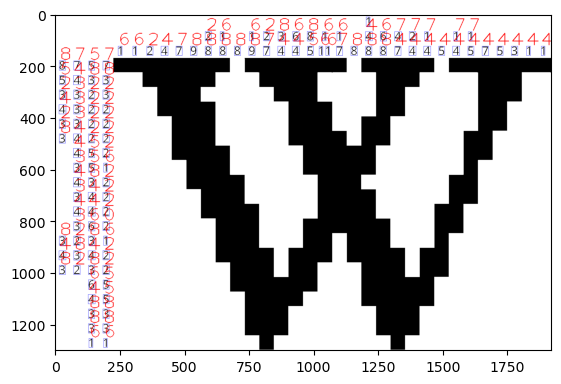

In [22]:
def removeOverlappingDigits(found_contours):
    result = []
    maxArea = 1000  # todo magic number

    for (boundingRect, digit, digit_image) in found_contours:
        hasOverlap = False
        for (otherBoundingRect, other_digit, _) in found_contours:
            overlapRect = (
                max(boundingRect[0], otherBoundingRect[0]), 
                max(boundingRect[1], otherBoundingRect[1]),
                min(boundingRect[0] + boundingRect[2], otherBoundingRect[0] + otherBoundingRect[2]), 
                min(boundingRect[1] + boundingRect[3], otherBoundingRect[1] + otherBoundingRect[3])
            )
            w = overlapRect[2] - overlapRect[0]
            h = overlapRect[3] - overlapRect[1]
            if (w > 0 and h > 0 and boundingRect != otherBoundingRect and other_digit != None and (otherBoundingRect[2] * otherBoundingRect[3] < maxArea)):
                overlap = w*h
                area = boundingRect[2]*boundingRect[3]
                if (overlap/area > .5):      # magic number!    # todo make sure we don't overlap slightly overlapping contours? (prob not possible)
                    hasOverlap = True
        
        if (not hasOverlap and digit != None and (boundingRect[2] * boundingRect[3] < maxArea)):
            result.append((boundingRect, digit, digit_image))
        else:
            print(f"remove {boundingRect} {digit}")

    return result

found_contours_no_overlaps = removeOverlappingDigits(found_contours)

imageOutput = imageCopy.copy()
imageOutput = cv2.cvtColor(imageOutput, cv2.COLOR_GRAY2BGR)
for (boundingRect, digit, digit_image) in found_contours_no_overlaps:
    cv2.putText(imageOutput, str(digit), (boundingRect[0], boundingRect[1]),  cv2.FONT_HERSHEY_PLAIN, 5, (255, 0, 0), 2)
    (x, y, w, h) = boundingRect
    cv2.rectangle(imageOutput, (x, y), (x+w,y+h), (0,0,255))
pyplot.imshow(imageOutput)
print(len(found_contours_no_overlaps))
print([(bounding_rect, digit) for bounding_rect, digit, _ in found_contours_no_overlaps])

11


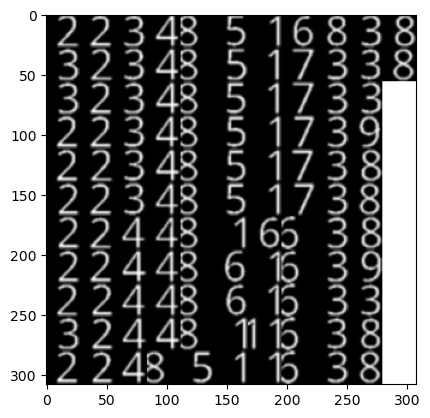

In [23]:
import math
def showImagesUsedForRecognition(found_contours, sort_by_prediction):
    imageSize = math.ceil(len(found_contours) ** .5)
    imageOutput = np.ones((imageSize * 28, imageSize * 28, 1), dtype=np.uint8) * 255

    x = 0
    y = 0

    contours_to_show = found_contours if not sort_by_prediction else sorted(found_contours, key= lambda tuple: tuple[1])
    for _, _, digit_image in contours_to_show:
        imageOutput[x*28:x*28+28, y*28:y*28+28] = digit_image
        x += 1
        if (x >= imageSize):
            x = 0
            y += 1

    print(imageSize)
    pyplot.imshow(imageOutput, cmap="gray")
showImagesUsedForRecognition(found_contours_no_overlaps, sort_by_prediction=True)

In [24]:
foundDigits = [(bounding_rect, digit) for (bounding_rect, digit, digit_image) in found_contours]
import determineTable

(A, alpha, B, beta) = grid_parameters = determineTable.findParameters(foundDigits)
(lefties, toppies) = determineTable.divideOverLeftAndTop(foundDigits, A, alpha, B, beta)

In [25]:
'''
import matplotlib.pyplot


A = 70; alpha = 20
B = 70; beta = 20

def computeCosts(A, alpha):
    costs = 0
    for (center, value) in foundDigits:
        predictionX  = round((center[0] - A) / alpha)
        predictionY = round((center[1] - B) / beta)
        costsX = (predictionX - center[0]) ** 2
        costsY = (predictionY - center[1]) ** 2
        #print(center, costsX, costsY)
        costs += costsX
    return costs

As = np.arange(60, 80, 1)
alphas = np.arange(10, 30, 1)
X, Y = np.meshgrid(As, alphas)
Z = np.vectorize(computeCosts)(X, Y)

fig, ax = matplotlib.pyplot.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z)
'''
'''
As = np.arange(60, 80, 1)
alphas = np.arange(10, 30, 1)
X, Y = np.meshgrid(As, alphas)
Z = np.vectorize(computeCosts)(X, Y)

fig, ax = matplotlib.pyplot.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)
#from matplotlib.ticker import LinearLocator
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#matplotlib.pyplot.show()
'''

'\nAs = np.arange(60, 80, 1)\nalphas = np.arange(10, 30, 1)\nX, Y = np.meshgrid(As, alphas)\nZ = np.vectorize(computeCosts)(X, Y)\n\nfig, ax = matplotlib.pyplot.subplots(subplot_kw={"projection": "3d"})\n# Plot the surface.\nsurf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm,\n                       linewidth=0, antialiased=False)\n#from matplotlib.ticker import LinearLocator\n# Customize the z axis.\nax.set_zlim(-1.01, 1.01)\nax.zaxis.set_major_locator(matplotlib.ticker.LinearLocator(10))\n# A StrMethodFormatter is used automatically\nax.zaxis.set_major_formatter(\'{x:.02f}\')\n\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\n\n#matplotlib.pyplot.show()\n'

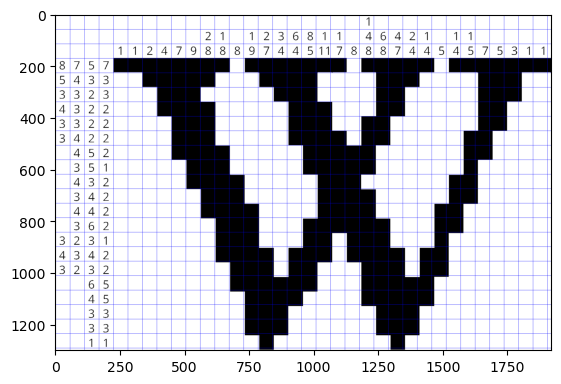

In [26]:
def addAxesFoundToImage(image, parameters):
    (A, alpha, B, beta) = parameters
    imageCopy = image.copy()
    imageCopy = cv2.cvtColor(imageCopy, cv2.COLOR_GRAY2BGR)
    for i in range(-200, 200):
        y = A + alpha * i + alpha//2
        x = B + beta * i + beta//2
        cv2.line(imageCopy, (0, x), (2000, x), (0,0,255))
        cv2.line(imageCopy, (y, 0), (y, 2000), (0,0,255))

    pyplot.imshow(imageCopy)

addAxesFoundToImage(imageCopy, grid_parameters)# (141, 56, 142, 57))# (49, 21, 67, 21))

In [27]:
print(lefties)
print(toppies)


[(-11, -5, 4), (-11, 5, 4), (-11, -8, 8), (-11, -6, 2), (-11, -4, 2), (-11, -3, 8), (-11, 4, 8), (-11, 6, 8), (-11, -7, 5), (-11, -5, 1), (-11, 5, 1), (-11, -8, 5), (-11, -8, 3), (-10, -7, 4), (-10, -3, 4), (-10, -2, 4), (-10, 0, 4), (-10, 2, 4), (-10, -8, 7), (-10, -6, 3), (-10, -5, 3), (-10, -4, 3), (-10, -1, 3), (-10, 1, 3), (-10, 3, 3), (-10, 4, 2), (-10, 5, 8), (-10, 6, 2), (-10, -7, 4), (-10, -3, 1), (-10, -2, 1), (-10, 0, 1), (-10, 2, 4), (-9, 1, 4), (-9, 2, 4), (-9, 5, 4), (-9, 8, 4), (-9, -7, 8), (-9, -6, 2), (-9, -5, 2), (-9, -4, 2), (-9, -3, 2), (-9, 0, 8), (-9, 3, 6), (-9, 4, 8), (-9, 6, 8), (-9, 7, 6), (-9, 9, 8), (-9, 10, 8), (-9, -8, 5), (-9, -2, 5), (-9, -1, 5), (-9, 11, 6), (-9, 1, 1), (-9, 2, 1), (-9, 5, 1), (-9, 8, 1), (-9, 7, 3), (-8, -8, 7), (-8, -7, 8), (-8, -6, 2), (-8, -5, 2), (-8, -4, 2), (-8, -3, 2), (-8, -2, 2), (-8, 0, 2), (-8, 1, 2), (-8, 2, 2), (-8, 3, 0), (-8, 5, 2), (-8, 6, 2), (-8, 9, 8), (-8, 10, 8), (-8, 7, 5), (-8, 8, 5), (-8, -1, 6), (-8, 4, 6), (-8